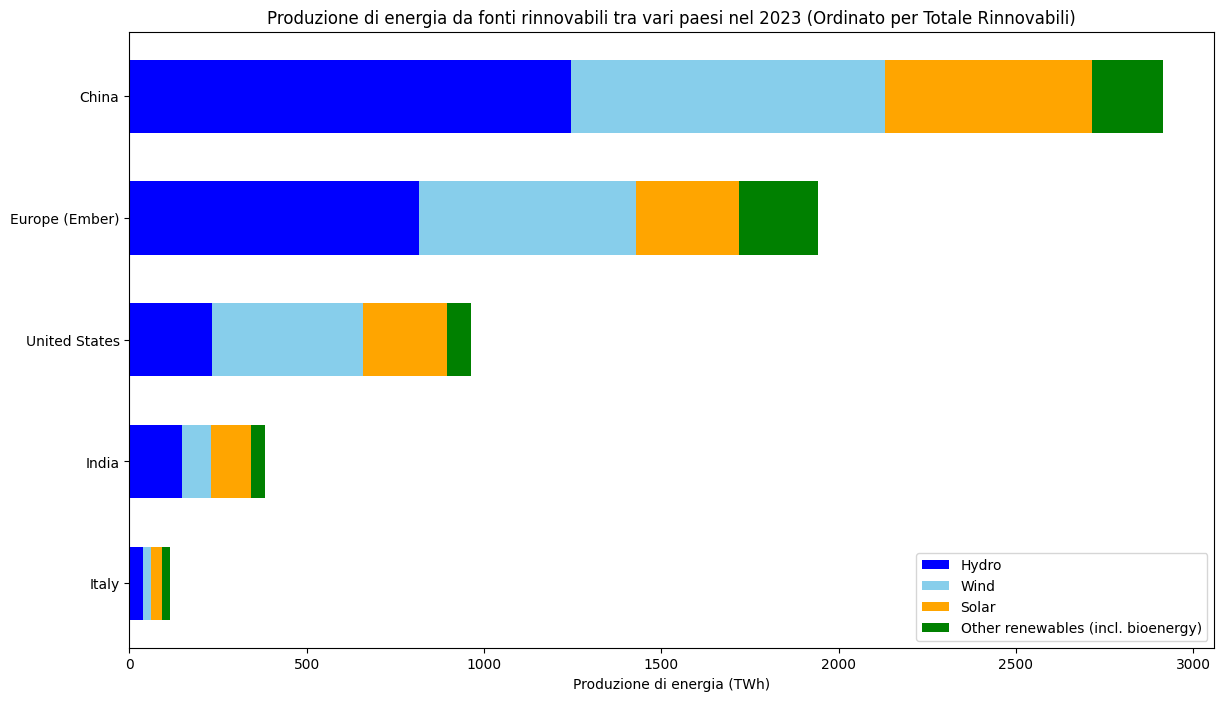

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')  # Stile elegante

# Caricamento dei dati
dati = pd.read_csv('..\csv\\fonti-rinnovabili\modern-renewable-prod\modern-renewable-prod.csv')
df = pd.DataFrame(dati)

# Filtraggio dei dati per l'anno 2023 e i paesi scelti
anno = 2023
paesi = ["United States", "Europe", "China", "India", "Europe (Ember)","Italy"]
df_filtered = df[df["Entity"].isin(paesi) & (df["Year"] == anno)].copy() # Usiamo .copy() per evitare Warning

# Calcola il consumo totale di rinnovabili per ordinare
df_filtered['Total Renewables'] = df_filtered[['Electricity from hydro - TWh', 'Electricity from wind - TWh', 'Electricity from solar - TWh', 'Other renewables including bioenergy - TWh']].sum(axis=1)

# Ordina il DataFrame per 'Total Renewables' in ordine decrescente
df_sorted = df_filtered.sort_values(by='Total Renewables', ascending=False)

# Impostazione del grafico
y = np.arange(len(df_sorted)) # Usa df_sorted
fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.6  # Spessore delle barre

# Creazione delle barre impilate - Usa df_sorted
bar1 = ax.barh(y, df_sorted["Electricity from hydro - TWh"], color="blue", label="Hydro", height=bar_height)
bar2 = ax.barh(y, df_sorted["Electricity from wind - TWh"], left=df_sorted["Electricity from hydro - TWh"], color="skyblue", label="Wind", height=bar_height)
bar3 = ax.barh(y, df_sorted["Electricity from solar - TWh"], left=df_sorted["Electricity from wind - TWh"] + df_sorted["Electricity from hydro - TWh"], color="orange", label="Solar", height=bar_height)
bar4 = ax.barh(y, df_sorted["Other renewables including bioenergy - TWh"], left=df_sorted["Electricity from solar - TWh"] + df_sorted["Electricity from wind - TWh"] + df_sorted["Electricity from hydro - TWh"], color="green", label="Other renewables (incl. bioenergy)", height=bar_height)


# Aggiunta delle etichette (una sotto l'altra) - Commentato fuori per chiarezza, puoi riattivare se necessario
# for i in range(len(df_sorted)):
#     x_pos = df_sorted.iloc[i, 2:6].sum()-2000  # Calcola la fine della barra
#     labels = [
#         f"{df_sorted.iloc[i]['Electricity from hydro - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Electricity from wind - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Electricity from solar - TWh']:.0f} TWh",
#         f"{df_sorted.iloc[i]['Other renewables including bioenergy - TWh']:.0f} TWh"
#     ]

#     # Posizionamento delle etichette una sotto l'altra, appena dopo la barra
#     for j, (value, color) in enumerate(zip(labels, ['blue', 'skyblue', 'orange', 'green'])):
#         ax.text(x_pos, y[i] - 0.2 + j * 0.2, value, va='bottom', fontsize=10,
#                 bbox=dict(facecolor='white', edgecolor=color, boxstyle='round,pad=0.3'))

# Titoli e legende
ax.set_xlabel("Produzione di energia (TWh)")
ax.set_title("Produzione di energia da fonti rinnovabili tra vari paesi nel 2023 (Ordinato per Totale Rinnovabili)") # Titolo aggiornato
ax.set_yticks(y)
ax.set_yticklabels(df_sorted["Entity"]) # Usa df_sorted per le etichette
ax.legend()

plt.gca().invert_yaxis() # Inverti l'asse Y per avere il valore più grande in alto

plt.show()

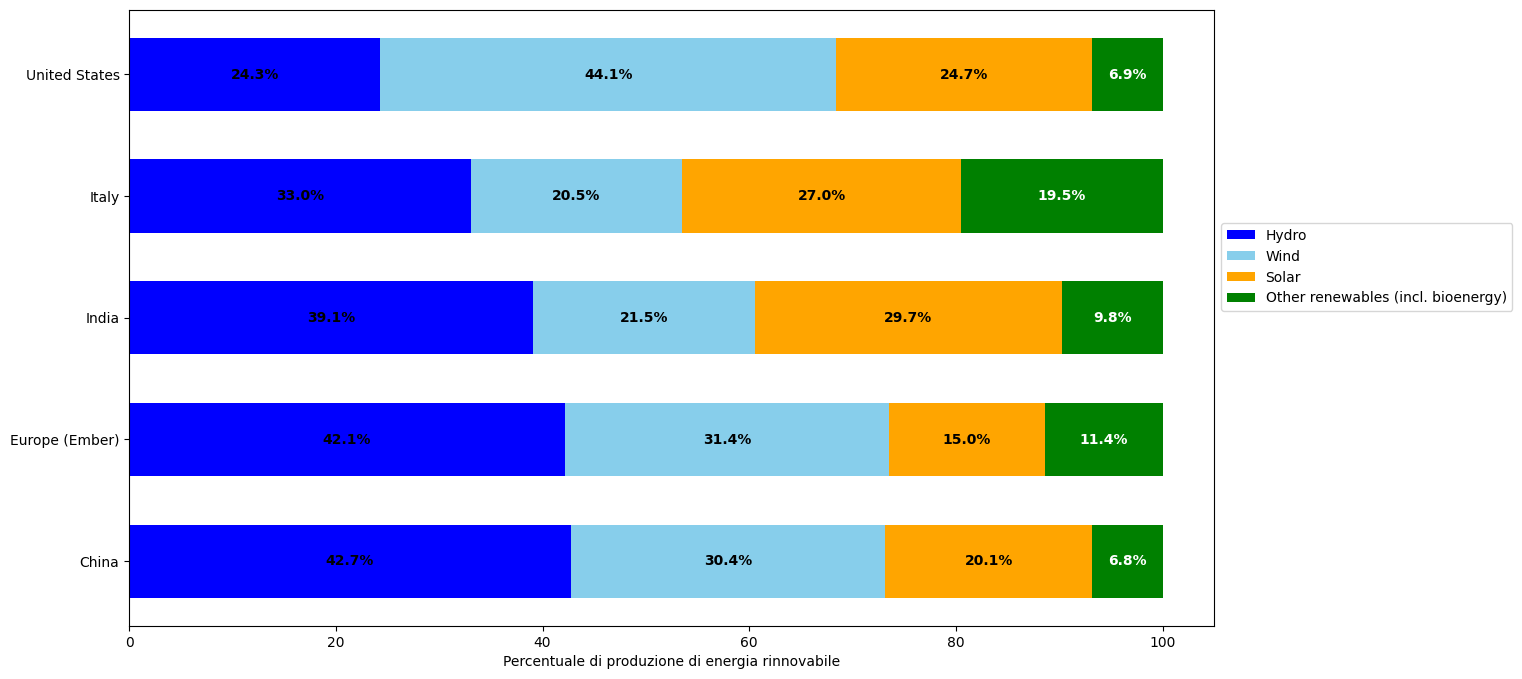

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')  # Stile elegante

# Caricamento dei dati
dati = pd.read_csv('..\csv\\fonti-rinnovabili\modern-renewable-prod\modern-renewable-prod.csv')
df = pd.DataFrame(dati)

# Filtraggio dei dati per l'anno 2023 e i paesi scelti
anno = 2023
paesi = ["United States", "Europe", "China", "India", "Europe (Ember)","Italy"]
df = df[df["Entity"].isin(paesi) & (df["Year"] == anno)]

df["energia totale"] = (df["Other renewables including bioenergy - TWh"] +
                        df["Electricity from solar - TWh"] +
                        df["Electricity from wind - TWh"] +
                        df["Electricity from hydro - TWh"])

df["hydro %"] = df["Electricity from hydro - TWh"]/df["energia totale"]*100
df["wind %"] = df["Electricity from wind - TWh"]/df["energia totale"]*100
df["solar %"] = df["Electricity from solar - TWh"]/df["energia totale"]*100
df["Other renewables including bioenergy %"] = df["Other renewables including bioenergy - TWh"]/df["energia totale"]*100


# Impostazione del grafico
y = np.arange(len(df))
fig, ax = plt.subplots(figsize=(14, 8))

bar_height = 0.6  # Spessore delle barre

# Creazione delle barre impilate
bar1 = ax.barh(y, df["hydro %"], color="blue", label="Hydro", height=bar_height)
bar2 = ax.barh(y, df["wind %"], left=df["hydro %"], color="skyblue", label="Wind", height=bar_height)
bar3 = ax.barh(y, df["solar %"], left=df["wind %"] + df["hydro %"], color="orange", label="Solar", height=bar_height)
bar4 = ax.barh(y, df["Other renewables including bioenergy %"], left=df["solar %"] + df["wind %"] + df["hydro %"], color="green", label="Other renewables (incl. bioenergy)", height=bar_height)

# Aggiunta delle etichette con le percentuali dentro le barre
for i in range(len(df)):
    # Aggiungere etichette per "Hydro"
    if df["hydro %"].iloc[i] > 2:  # Solo se la percentuale è significativa
        ax.text(df["hydro %"].iloc[i] / 2, i, f'{df["hydro %"].iloc[i]:.1f}%', va='center', ha='center', color='black', fontweight='bold')

    # Aggiungere etichette per "Wind"
    if df["wind %"].iloc[i] > 2:  # Solo se la percentuale è significativa
        ax.text(df["hydro %"].iloc[i] + df["wind %"].iloc[i] / 2, i, f'{df["wind %"].iloc[i]:.1f}%', va='center', ha='center', color='black', fontweight='bold')

    # Aggiungere etichette per "Solar"
    if df["solar %"].iloc[i] > 2:  # Solo se la percentuale è significativa
        ax.text(df["wind %"].iloc[i] + df["hydro %"].iloc[i] + df["solar %"].iloc[i] / 2, i, f'{df["solar %"].iloc[i]:.1f}%', va='center', ha='center', color='black', fontweight='bold')

    # Aggiungere etichette per "Other renewables including bioenergy"
    if df["Other renewables including bioenergy %"].iloc[i] > 2:  # Solo se la percentuale è significativa
        ax.text(df["solar %"].iloc[i] + df["wind %"].iloc[i] + df["hydro %"].iloc[i] + df["Other renewables including bioenergy %"].iloc[i] / 2, i, f'{df["Other renewables including bioenergy %"].iloc[i]:.1f}%', va='center', ha='center', color='white', fontweight='bold')

# Titoli e legende
ax.set_xlabel("Percentuale di produzione di energia rinnovabile") # Modificato l'xlabel per riflettere le percentuali
#ax.set_title("Quota percentuale di produzione di energia da fonti rinnovabili tra vari paesi nel 2023") # Modificato il titolo
ax.set_yticks(y)
ax.set_yticklabels(df["Entity"])

# **Modifica principale: Spostare la legenda fuori dal grafico a destra**
ax.legend(loc='lower left', bbox_to_anchor=(1, 0.5)) # Posiziona la legenda a destra, centrata verticalmente

plt.show()

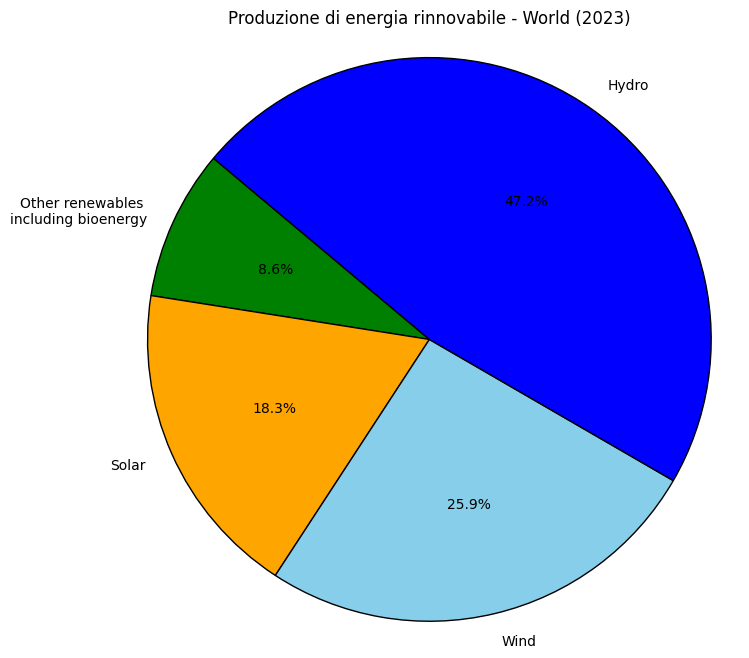

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')  # Stile elegante

# Caricamento dei dati
dati = pd.read_csv('..\csv\\fonti-rinnovabili\modern-renewable-prod\modern-renewable-prod.csv')
df = pd.DataFrame(dati)

# Parametri modificabili per paese e anno
paese = "World"
anno = 2023

# Filtro per il paese e l'anno
df = df[(df['Entity'] == paese) & (df["Year"] == anno)]

# Verifica che ci siano dati per il paese e l'anno specificati
if df.empty:
    print(f"Non ci sono dati disponibili per {paese} nel {anno}.")
else:
    # Calcolo del totale delle energie rinnovabili
    totale = df[[
        "Other renewables including bioenergy - TWh",
        "Electricity from solar - TWh",
        "Electricity from wind - TWh",
        "Electricity from hydro - TWh"
    ]].sum(axis=1).values[0]

    # Creazione della lista delle percentuali
    percentuale = [
        df["Other renewables including bioenergy - TWh"].values[0] / totale * 100,
        df["Electricity from solar - TWh"].values[0] / totale * 100,
        df["Electricity from wind - TWh"].values[0] / totale * 100,
        df["Electricity from hydro - TWh"].values[0] / totale * 100
    ]

    # Etichette e colori per il grafico a torta
    labels = ["Other renewables \nincluding bioenergy", "Solar", "Wind", "Hydro"]
    colors = ["green", "orange", "skyblue", "blue"]

    # Creazione del grafico a torta
    plt.figure(figsize=(8, 8))  # Imposta dimensioni
    plt.pie(percentuale, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

    # Titolo
    plt.title(f"Produzione di energia rinnovabile - {paese} ({anno})")

    # Assicurarsi che il grafico sia circolare
    plt.axis('equal')

    # Mostra il grafico
    plt.show()



